In [49]:
from keras.datasets import mnist
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import KFold
import numpy as np

In [60]:
#loading mnist data set
(trainX, trainy), (testX, testy) = mnist.load_data()

Train Set: X=(60000, 28, 28), y=(60000,)
Test Set: X=(10000, 28, 28), y=(10000,)


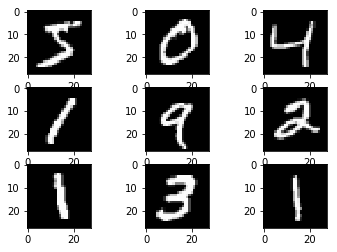

In [61]:
print('Train Set: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test Set: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [62]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [63]:
# one hot encode target values
trainy = to_categorical(trainy)
testy = to_categorical(testy)

Train Set: X=(60000, 28, 28), y=(60000, 10)
Test Set: X=(10000, 28, 28), y=(10000, 10)


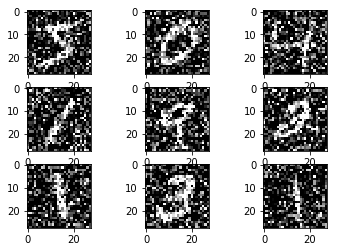

In [64]:
noise_factor = 0.5
trainX_noise = trainX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=trainX.shape)
testX_noise = testX + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=testX.shape)
trainX_noise = np.clip(trainX_noise, 0, 1)
testX_noise = np.clip(testX_noise, 0, 1)
print('Train Set: X=%s, y=%s' % (trainX_noise.shape, trainy.shape))
print('Test Set: X=%s, y=%s' % (testX_noise.shape, testy.shape))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX_noise[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [65]:
# reshape dataset to have a single channel
trainX = trainX_noise.reshape((trainX.shape[0], 28, 28, 1))
testX = testX_noise.reshape((testX.shape[0], 28, 28, 1))
print('Train Set: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test Set: X=%s, y=%s' % (testX.shape, testy.shape))

Train Set: X=(60000, 28, 28, 1), y=(60000, 10)
Test Set: X=(10000, 28, 28, 1), y=(10000, 10)


In [66]:
#initial model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               460900    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
_________________________________________________________________


In [68]:
# fit model
history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 711us/step - loss: 0.3596 - accuracy: 0.8833 - val_loss: 0.1626 - val_accuracy: 0.9462
Epoch 2/10
60000/60000 [==============================] - 40s 666us/step - loss: 0.1460 - accuracy: 0.9533 - val_loss: 0.1535 - val_accuracy: 0.9517
Epoch 3/10
60000/60000 [==============================] - 40s 666us/step - loss: 0.0963 - accuracy: 0.9687 - val_loss: 0.1366 - val_accuracy: 0.9559
Epoch 4/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0614 - accuracy: 0.9801 - val_loss: 0.1444 - val_accuracy: 0.9554
Epoch 5/10
60000/60000 [==============================] - 52s 875us/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.1653 - val_accuracy: 0.9505
Epoch 6/10
60000/60000 [==============================] - 47s 776us/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 0.1555 - val_accuracy: 0.9592
Epoch 7/10
60000/60000 [==============================] 

In [69]:
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print('Accuracy : %.3f' % (acc * 100.0))

Accuracy : 95.990
